# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# load rankings data
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
print(wood.head())
# load rankings data
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(steel.head())

# How many rows are in each DF
print(wood.info())
print(steel.info())

# Count the number of different Suppliers in each DF
print(wood.Supplier.nunique())
print(steel.Supplier.nunique())

# Get total number of rankings by year
wood_yr_rank = wood.groupby('Year of Rank').Name.count().reset_index()
print(wood_yr_rank)
steel_yr_rank = steel.groupby('Year of Rank').Name.count().reset_index()
print(steel_yr_rank)

# Locate roller coasters ranked from Six Flags Magic Mountain
steel_mm = steel[(steel.Park == 'Six Flags Magic Mountain')]
print(steel_mm)

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

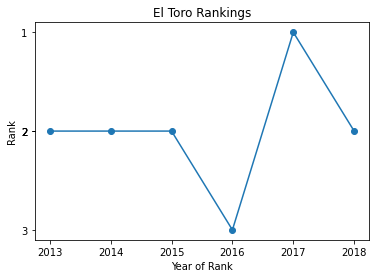

<Figure size 432x288 with 0 Axes>

In [2]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def coaster_ranking_plot(coaster_name, coaster_park, df):
    coaster_rank = df[(df['Name'] == coaster_name) & (df['Park'] == coaster_park)]
    fig, ax = plt.subplots()
    plt.plot(coaster_rank['Year of Rank'],coaster_rank['Rank'], marker = 'o')
    ax.set_xticks(coaster_rank['Year of Rank'].values)
    ax.set_yticks(coaster_rank['Rank'].values)
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
    ax.invert_yaxis()
    plt.title(f'{coaster_name} Rankings')
    plt.show()
    plt.clf()

# Create a plot of El Toro ranking over time
coaster_ranking_plot('El Toro', 'Six Flags Great Adventure', wood)
plt.clf()

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

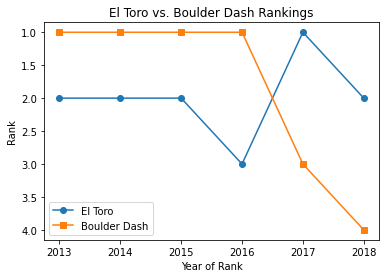

<Figure size 432x288 with 0 Axes>

In [4]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def two_coaster_plot(coaster_name1, coaster_park1, coaster_name2, coaster_park2, df):
    coaster_rank1 = df[(df['Name'] == coaster_name1) & (df['Park'] == coaster_park1)]
    coaster_rank2 = df[(df['Name'] == coaster_name2) & (df['Park'] == coaster_park2)]
    fig, ax = plt.subplots()
    plt.plot(coaster_rank1['Year of Rank'], coaster_rank1['Rank'], marker = 'o', label = coaster_name1)
    plt.plot(coaster_rank2['Year of Rank'], coaster_rank2['Rank'], marker = 's', label = coaster_name2)
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
    ax.invert_yaxis()
    plt.title(f'{coaster_name1} vs. {coaster_name2} Rankings')
    plt.legend()
    plt.show()
    plt.clf()
    
# Create a plot of El Toro and Boulder dash hurricanes
two_coaster_plot('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', wood)
plt.clf()

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

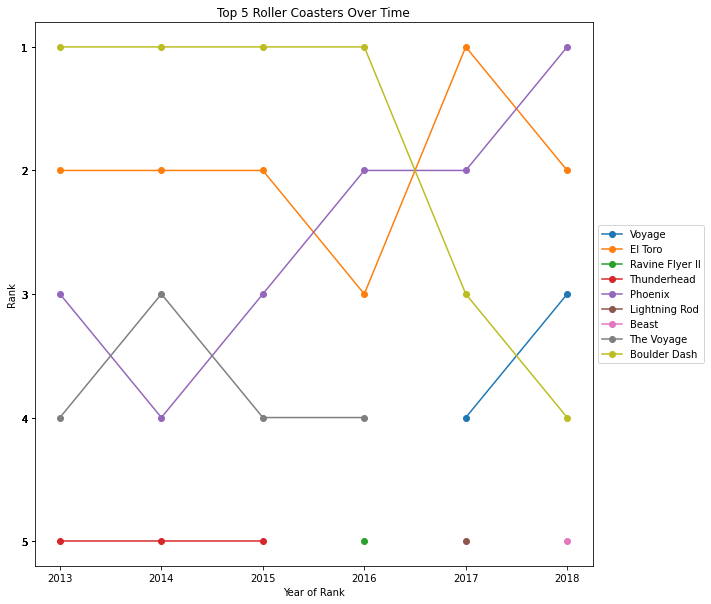

<Figure size 432x288 with 0 Axes>

In [5]:
# 4
# Create a function to plot top n rankings over time
def top_n_plot(df, n):
    top_n_rank = df[df['Rank'] <= n]
    fig, ax = plt.subplots(figsize = (10, 10))
    for coaster in set(top_n_rank['Name']):
        coaster_rank = top_n_rank[top_n_rank['Name'] == coaster]
        ax.plot(coaster_rank['Year of Rank'], coaster_rank['Rank'], marker = 'o', label = coaster)
    ax.set_yticks(top_n_rank['Rank'].values)
    ax.invert_yaxis()
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
    plt.title(f'Top {n} Roller Coasters Over Time')
    plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), ncol = 1)
    plt.show()
    plt.clf()

# Create a plot of top n rankings over time
top_n_plot(wood, 5)
plt.clf()

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [6]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

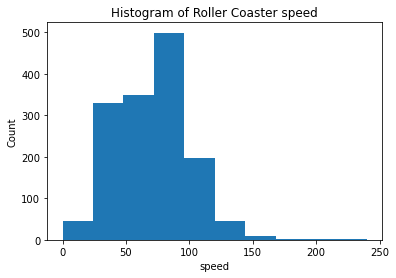

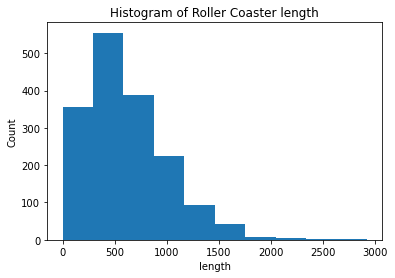

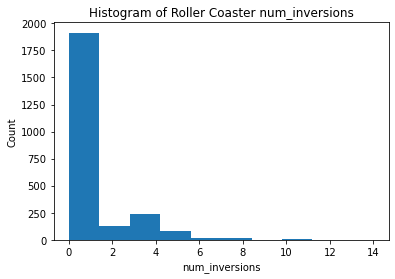

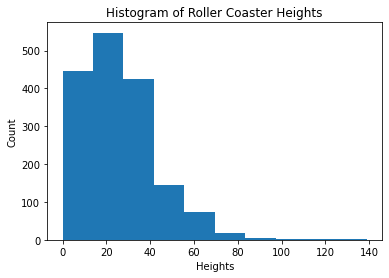

<Figure size 432x288 with 0 Axes>

In [7]:
# 6
# Create a function to plot histogram of column values
def rc_hist_plot(df, column):
    plt.hist(df[column].dropna())
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Histogram of Roller Coaster {column}')
    plt.show()
    plt.clf()
# Create histogram of roller coaster speed
rc_hist_plot(roller_coasters, 'speed')
plt.clf()
# Create histogram of roller coaster length
rc_hist_plot(roller_coasters, 'length')
plt.clf()
# Create histogram of roller coaster number of inversions
rc_hist_plot(roller_coasters, 'num_inversions')
plt.clf()
# Create a function to plot histogram of height values
def height_values_plot(df):
    heights = df[df['height'] <= 140]['height'].dropna()
    plt.hist(heights)
    plt.xlabel('Heights')
    plt.ylabel('Count')
    plt.title('Histogram of Roller Coaster Heights')
    plt.show()
    plt.clf()
# Create a histogram of roller coaster height
height_values_plot(roller_coasters)
plt.clf()

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

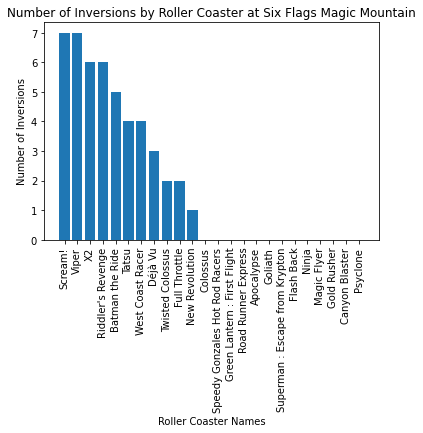

<Figure size 432x288 with 0 Axes>

In [8]:
# 7
# Create a function to plot inversions by coaster at park
def park_inv_plot(df, park_name):
    select_park = df[(df['park'] == park_name)]
    select_park = select_park.sort_values('num_inversions', ascending = False)
    coaster_names = select_park['name']
    num_inversions = select_park['num_inversions']
    plt.bar(range(len(num_inversions)), num_inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names, rotation = 90)
    plt.xlabel('Roller Coaster Names')
    plt.ylabel('Number of Inversions')
    plt.title(f'Number of Inversions by Roller Coaster at {park_name}')
    plt.show()
    plt.clf()
# Create barplot of inversions by roller coasters
park_inv_plot(roller_coasters, 'Six Flags Magic Mountain')
plt.clf()

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

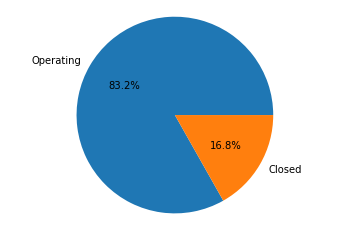

<Figure size 432x288 with 0 Axes>

In [9]:
# 8
# Create a function to plot a pie chart of status.operating
def status_plot(df):
    operating = df[(df['status'] == 'status.operating')]
    closed = df[(df['status'] == 'status.closed.definitely')]
    num_operating = len(operating)
    num_closed = len(closed)
    status_count = [num_operating, num_closed]
    plt.pie(status_count, labels = ['Operating', 'Closed'], autopct = '%0.1f%%')
    plt.axis('equal')
    plt.show()
    plt.clf()
# Create pie chart of roller coasters
status_plot(roller_coasters)
plt.clf()

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

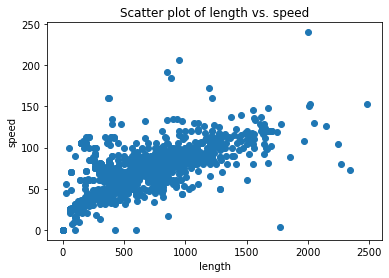

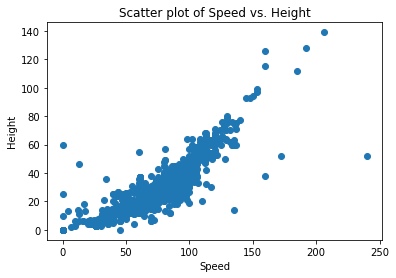

<Figure size 432x288 with 0 Axes>

In [10]:
# 9
# Create a function to plot scatter of any two columns
def scatter_comp_plot(df, column1, column2):
    plt.scatter(df[column1], df[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Scatter plot of {column1} vs. {column2}')
    plt.show()
    plt.clf()

scatter_comp_plot(roller_coasters, 'length', 'speed')

# Create a function to plot scatter of speed vs height
def scatter_height_speed(df):
    heights_df = df[df['height'] <= 140]
    plt.scatter(heights_df['speed'], heights_df['height'])
    plt.xlabel('Speed')
    plt.ylabel('Height')
    plt.title('Scatter plot of Speed vs. Height')
    plt.show()
    plt.clf()
# Create a scatter plot of roller coaster height by speed
scatter_height_speed(roller_coasters)
plt.clf()

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

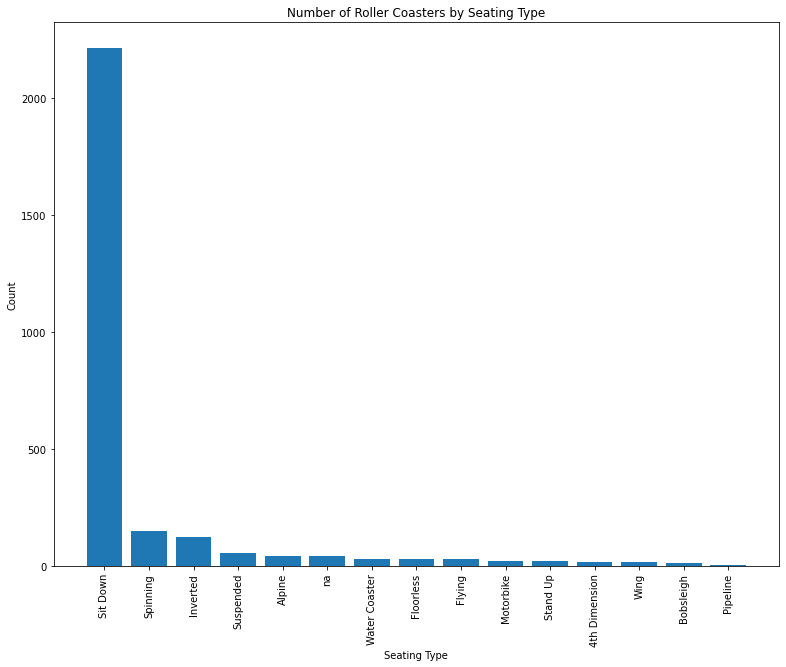

<Figure size 432x288 with 0 Axes>

In [19]:
def seating_types(df):
    seating = df.groupby('seating_type').name.count().sort_values(ascending = False).reset_index()
    plt.figure(figsize = (13,10))
    plt.bar(range(len(seating)), seating['name'])
    ax = plt.subplot()
    ax.set_xticks(range(len(seating)))
    ax.set_xticklabels(seating['seating_type'], rotation = 90)
    plt.xlabel('Seating Type')
    plt.ylabel('Count')
    plt.title('Number of Roller Coasters by Seating Type')
    plt.show()
    plt.clf()

seating_types(roller_coasters)
plt.clf()

## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.